### Outline
---
- General theory - model readiness, how often to retrain, when to revisit model choices
- Model Persistence - saving & loading fitted model
    * **Pickle** - [sklearn documentation](https://scikit-learn.org/stable/modules/model_persistence.html)
    * **Joblib** (more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators)
- Deployment & APIs
    * save model as a serialized pickle file
    * create .py script to read JSON file
    * use FLASK to accept features and reutrn predictions as an API with POST/ GET (using POSTMAN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('../../github/python-data-science/data/advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# df['total_ad'] = df['TV'] + df['radio'] + df['newspaper']

In [7]:
X = df.drop(columns='sales')
y = df['sales']

In [8]:
# TRAIN | VALIDATION | TEST
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

print(X_train.shape), print(X_val.shape), print(X_test.shape)

(140, 3)
(30, 3)
(30, 3)


(None, None, None)

In [9]:
model = RandomForestRegressor(n_estimators=30, random_state=101)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=101)

In [10]:
y_val_pred = model.predict(X_val)

print('MAE: {:.4f}'.format(mean_absolute_error(y_val, y_val_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_val, y_val_pred))))

MAE: 0.5816
RMSE: 0.6732


In [11]:
df.describe()['sales']

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

In [12]:
# TEST set
y_test_pred = model.predict(X_test)
print('MAE: {:.4f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_val, y_val_pred))))

MAE: 0.7224
RMSE: 0.6732


In [13]:
# Is it overfitting?? YES

Xcv = pd.concat([X_train, X_val], axis=0)
Ycv = pd.concat([y_train, y_val], axis=0)
print(Xcv.shape, Ycv.shape)

results = cross_validate(model, Xcv, Ycv, cv=5,
                         scoring =['neg_mean_absolute_error', 'neg_mean_squared_error'], 
                         return_train_score=True)

print('Train MAE: ', -results['train_neg_mean_absolute_error'].mean().round(4),
      'Test MAE: ',  -results['test_neg_mean_absolute_error'].mean().round(4))
print('Train RMSE: ', (-results['train_neg_mean_squared_error'].mean())**0.5,
      'Test RMSE: ',  (-results['test_neg_mean_squared_error'].mean())**0.5)

(170, 3) (170,)
Train MAE:  0.2382 Test MAE:  0.6114
Train RMSE:  0.3337174747315109 Test RMSE:  0.8114807734947477


---

### Fitting Final model on all data

In [14]:
# Final Model
final_model = RandomForestRegressor(n_estimators=30, random_state=101)
final_model.fit(X,y)

RandomForestRegressor(n_estimators=30, random_state=101)

### Saving & Loading data

In [15]:
# Saving Model
import joblib

In [16]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [17]:
joblib.dump(list(X.columns), 'col_names.pkl')

['col_names.pkl']

In [18]:
# Loading Model
new_columns = joblib.load('col_names.pkl')
loaded_model = joblib.load('final_model.pkl')

In [19]:
loaded_model.predict([[230.1, 37.8, 69.2]])

array([21.99])

---

### Flask
* General library to create web-application / http-application using python
* Wrap the model as an API using FLASK

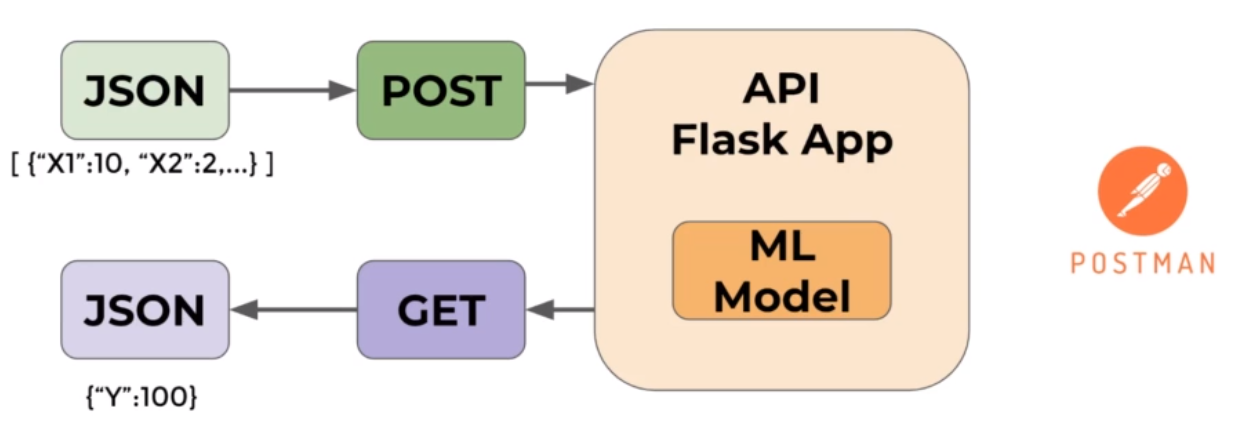

In [20]:
from IPython.display import Image
Image('flask_deploy.png') 

In [21]:
# !pip install Flask

In [22]:
# from flask import Flask, request, jsonify
# import joblib 
# import pandas as pd

# # CREATE FLASK APP
# app = Flask(__name__)


# # CONNET POST API CALL TO PREDICT() FUNCTION
# # http://localhost:5000/predict

# @app.route('/predict', methods=['POST'])       #decorator
# def predict():

#     # get the json request
#     feat_data = request.json

#     # convert json to pandas df (correct order)
#     df = pd.DataFrame(feat_data)
#     df = df.reindex(columns=col_names)

#     # predict and return predict as json
#     result = list(model.predict(df))

#     return jsonify({'prediction':str(result)})


# # LOAD MY MODEL & SETUP COLUMNS NAMES
# if __name__ == '__main__':
#     model = joblib.load('final_model.pkl')
#     col_names = joblib.load('col_names.pkl')
#     app.run(debug=True)

In [23]:
# Install Postman app - test apis be sending get/post requests

In [24]:
# Pull up command prompt from Anaconda
# run the api.py file

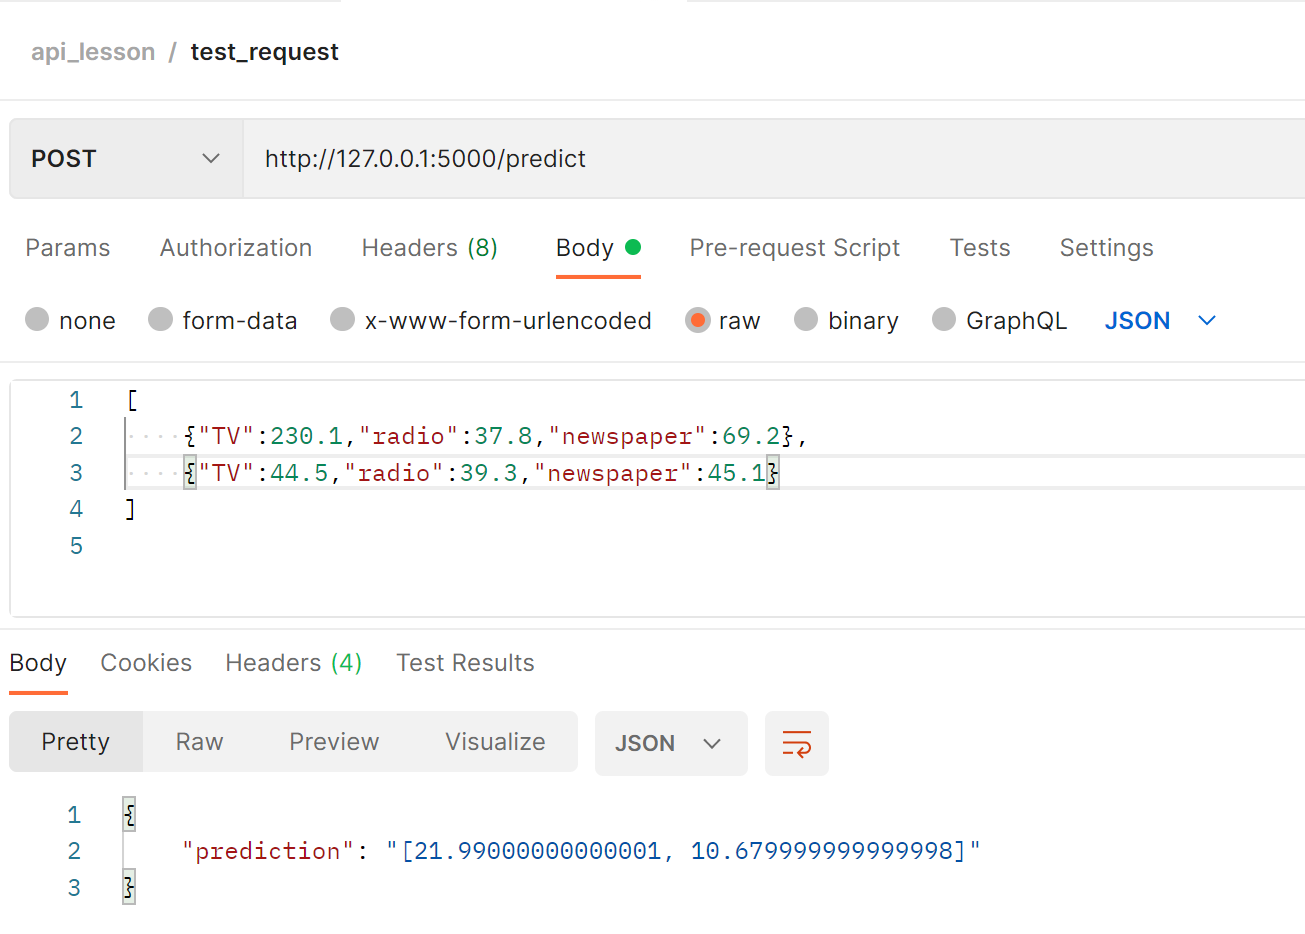

In [25]:
Image('flask_result.png') 

--- 

In [26]:
# Doesn't work this way. Use Postman instead

In [27]:
# import json
# import requests

# url = 'http://127.0.0.1:5000/predict'

In [28]:
# user_input = [float(i) for i in input('Enter ad spends for TV, radio and newspaper: ').split()]

In [29]:
# data = [{"TV":user_input[0],"radio":user_input[1],"newspaper":user_input[2]}]
# print(json.dumps(data))

In [30]:
# rv = requests.post(url, data=json.dumps(data))
# if rv.status_code != requests.codes.ok:
#     rv.raise_for_status()